<h1>Assignment 6</h1>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [7]:
df = pd.read_csv('auto-mpg.csv', delimiter=r'\s+', header=0)  
df

,mpg,cyl,displ,hp,mass,acc,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [9]:
df.drop('name', axis=1, inplace=True)

In [11]:
df = df.apply(pd.to_numeric, errors='coerce')

In [13]:
df

,mpg,cyl,displ,hp,mass,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   displ   398 non-null    float64
 3   hp      392 non-null    float64
 4   mass    398 non-null    float64
 5   acc     398 non-null    float64
 6   year    398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [17]:
df = df.apply(pd.to_numeric, errors='coerce')
df

,mpg,cyl,displ,hp,mass,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [19]:
df.dropna(inplace=True)

In [21]:
df

,mpg,cyl,displ,hp,mass,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [23]:
correlation_matrix = df.corr()
correlation_matrix

,mpg,cyl,displ,hp,mass,acc,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displ,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
mass,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acc,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: xlabel='displ', ylabel='mpg'>

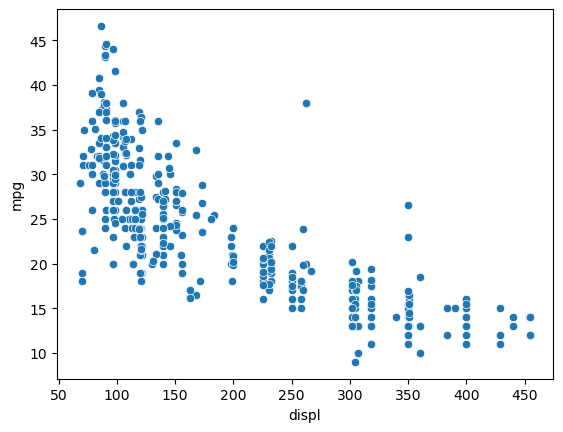

In [29]:
variables = ['displ', 'hp', 'mass', 'acc']
sns.scatterplot(x='displ', y='mpg', data=df)

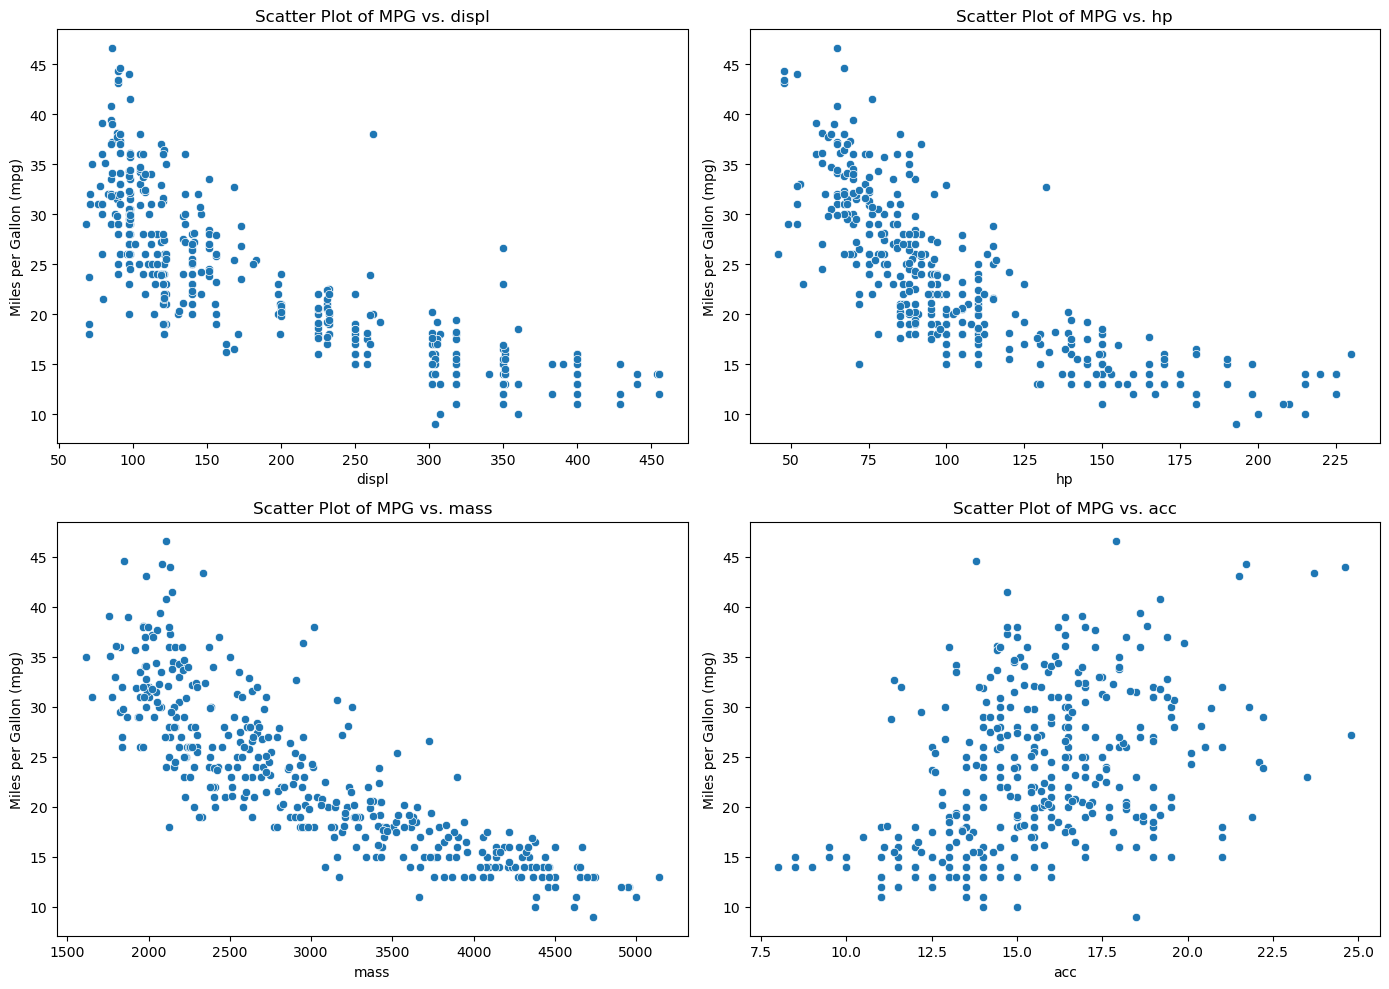

In [27]:
plt.figure(figsize=(14, 10))

variables = ['displ', 'hp', 'mass', 'acc']
for i, var in enumerate(variables, start=1):
    plt.subplot(2, 2, i) 
    sns.scatterplot(x=var, y='mpg', data=df)
    plt.title(f'Scatter Plot of MPG vs. {var}')
    plt.xlabel(var)
    plt.ylabel('Miles per Gallon (mpg)')

plt.tight_layout() 
plt.show()

<h1>Start with Single Variable Model</h1>

In [28]:
X_single = df['displ'] #independent
y = df['mpg']#dependent

In [31]:
X_single = sm.add_constant(X_single) #addding Constant

In [32]:
model_single = sm.OLS(y, X_single).fit()#fit

In [33]:
model_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.66e-90
Time:                        18:54:09   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1206      0.494     71.033      0.000      34.149      36.093
displ         -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Adding More independent Variable</h1>

In [34]:
X_multiple = df[['cyl', 'displ', 'hp', 'mass', 'acc']]

In [35]:
X_multiple = sm.add_constant(X_multiple)


In [36]:
model_multiple = sm.OLS(y, X_multiple).fit()


In [37]:
model_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          9.82e-101
Time:                        18:56:42   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2643      2.669     17.331      0.000      41.016      51.513
cyl           -0.3979      0.411     -0.969      0.333      -1.205       0.409
displ      -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
hp            -0.0453      0.017     -2.716      0.007      -0.078      -0.012
mass          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acc           -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Adding Power to improve the model</h1>

In [38]:
df['displ_squared'] = df['displ']**2
df['hp_squared'] = df['hp']**2

In [39]:
X_transformed = df[['cyl', 'displ', 'displ_squared', 'hp', 'hp_squared', 'mass', 'acc']]

In [40]:
X_transformed = sm.add_constant(X_transformed)

In [41]:
model_transformed = sm.OLS(y, X_transformed).fit()

In [42]:
model_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     173.9
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          6.76e-115
Time:                        19:00:42   Log-Likelihood:                -1081.3
No. Observations:                 392   AIC:                             2179.
Df Residuals:                     384   BIC:                             2210.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.9455      3.383     18.309      0.000      55.293      68.598
cyl               0.8157      0.398      2.051      0.041       0.034       1.597
displ            -0.0848      0.019     -4.561      0.000      -0.121      -0.048
displ_squared     0.0001   3.44e-05      3.532      0.000    5.38e-05       0.000
hp               -0.3002      0.051     -5.892      0.000      -0.400      -0.200
hp_squared        0.0007      0.000      4.138      0.000       0.000       0.001
mass             -0.0014      0.001     -1.569      0.117      -0.003       0.000
acc              -0.3920      0.130     -3.016      0.003      -0.648      -0.136
==============================================================================
Omnibus:                       39.099   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.328
Skew:                           0.618   Prob(JB):                     2.40e-15
Kurtosis:                       4.611   Cond. No.                     1.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Adding Product of two independent variable to improve the model</h1>

In [43]:
df['displ_hp_interaction'] = df['displ'] * df['hp']

In [44]:
X_interactions = df[['cyl', 'displ', 'hp', 'mass', 'acc', 'displ_hp_interaction']]

In [45]:
X_interactions = sm.add_constant(X_interactions)

In [46]:
model_interactions = sm.OLS(y, X_interactions).fit()

In [47]:
model_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          3.09e-117
Time:                        19:02:37   Log-Likelihood:                -1078.6
No. Observations:                 392   AIC:                             2171.
Df Residuals:                     385   BIC:                             2199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   60.4417      2.827     21.383      0.000      54.884      65.999
cyl                      0.7736      0.390      1.986      0.048       0.008       1.540
displ                   -0.0980      0.013     -7.468      0.000      -0.124      -0.072
hp                      -0.2539      0.027     -9.570      0.000      -0.306      -0.202
mass                    -0.0013      0.001     -1.608      0.109      -0.003       0.000
acc                     -0.3550      0.118     -3.001      0.003      -0.588      -0.122
displ_hp_interaction     0.0006   6.09e-05      9.536      0.000       0.000       0.001
==============================================================================
Omnibus:                       54.430   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.702
Skew:                           0.772   Prob(JB):                     6.76e-24
Kurtosis:                       5.037   Cond. No.                     4.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""